In [2]:
import re

import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt
# from imblearn.over_sampling import RandomOverSampler

## Concatenate Dataset into one File

In [3]:
from typing import List, Dict
import os
import shutil


def convertToTxt(filename: str):
    createDirec("raw_data")
    shutil.copy("all_data/{}.csv".format(filename), "raw_data/{}.txt".format(filename))
    f = open("raw_data/{}.txt".format(filename), mode="r", encoding="utf8")
    oldList = f.readlines()
    list = [x.split(",")[0] + "\n" for x in oldList]
    list = list[1:]
    f.close()
    f = open("raw_data/{}.txt".format(filename), mode="w", encoding="utf8")
    f.writelines(list)
    f.close()
    print(oldList[1])
    print(list[0])


def createDirec(directory: str):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
        print("Success")
    except:
        print("fail")

def eraseSpaceMode(realFile):
    return [f for f in realFile if f.strip()]

def majToMAJOR(realFile):
    return [re.sub("-MAJ", "-MAJOR", f) for f in realFile if f.strip()]


def eraseSpace(directory: str):
    files = getFileNameFromDir(direc=directory)
    for file in files:
        realFile = open("{}/{}".format(directory, file), mode="r", encoding="UTF-8")
        data = majToMAJOR(realFile)
        realFile.close()
        realFile = open("{}/{}".format(directory, file), mode="w", encoding="UTF-8")
        realFile.writelines(data)
        realFile.close()


def getFileNameFromDir(direc: str) -> List[str]:
    return [f for f in os.listdir("{}/".format(direc))]


def restructureFile(direcToScan: str, f: str):
    data = pd.read_csv("{}/{}".format(direcToScan, f), encoding="UTF-8")
    data.rename(columns=({"Questions": "Question", "Intents": "Intent"}), inplace=True)
    print(f)
    data["Question"].dropna(inplace=True)
    if data.isnull().any().any():
        print(data.columns())
        print(data.isna().sum())
        print(data.head())

    data.to_csv("{}/{}".format(direcToScan, f), encoding="UTF-8", index=False)
    return data


def myConcat(direcToScan: str, outputFilename: str, outputDirec: str = "all_data"):
    files = getFileNameFromDir(direc=direcToScan)

    datasets = pd.concat([restructureFile(direcToScan=direcToScan, f=f) for f in files], axis=0, ignore_index=True)

    datasets.to_csv("{}/{}.csv".format(outputDirec, outputFilename), index=False)


def myOversampling(fileName: str):
    temp = pd.read_csv("all_data/{}.csv".format(fileName))

    y = temp["Intent"]
    X = temp.drop("Intent", axis=1)

    ros = RandomOverSampler(random_state=0)
    ros.fit(X, y)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    newTable = X_resampled
    newTable["Intent"] = y_resampled
    createDirec(directory="oversampling")
    newTable.to_csv("oversampling/{}.csv".format(fileName), index=False)
    return newTable

In [4]:
## Concatenate All Dataset into one File
myConcat(direcToScan="datasets", outputFilename="all_data_dataset")

## Concatenate All Entity-tag Dataset into one File
myConcat(direcToScan="entity-tag", outputFilename="all_entity_dataset")

## Concatenate All Segmentation Dataset into one File
myConcat(direcToScan="segments", outputFilename="all_segment_dataset")

## Concatenate All Segmentation Dataset into one File
myConcat(direcToScan="POS/", outputFilename="all_pos_dataset")

AskAboutCompetition.csv
FindTSC.csv
IsCanteenExist.csv
AskWhereHRRoomIs.csv
AskAboutAcademicFee.csv
FindTNInfo.csv
FindResearcherRoom.csv
IsLibraryExist.csv
AskAboutCarParkingFee.csv
IsProvinceExist.csv
AskAboutClubInfo.csv
FindECInfo.csv
IsExistDoorExit.csv
SchoolMission.csv
AskHowToComplain.csv
AskaboutMaleDressCode.csv
IsFootballFieldExist.csv
AskAboutLocation.csv
AskAboutRegisterDate.csv
AskAboutAccountantRoom.csv
AskAboutDormInfo.csv
WhyShouldChooseCADT.csv
ListEvent.csv
AskAboutAge.csv
FindEnrollmentLocation.csv
AskAboutParkingPrice.csv
FindAnnouncementInfo.csv
ListClub.csv
ListParkingSpace.csv
ListInstitutionRule.csv
FindClub.csv
AskAboutCS_CourseInEachGen.csv
IsMinistryExist.csv
AskAboutEC_CourseInEachGen.csv
AskAboutInterest.csv
FindCSInfo.csv
AskWorkingDate.csv
SchoolBusInfo.csv
AskWhetherJobAnnoucementExist.csv
AskAboutProvince.csv
FindTotalStudents.csv
AskWhetherPoepleWorkonExactDate.csv
AskAboutSchoolMajors.csv
AskAboutMotocycleParkingFee.csv
ScholarshipInfo.csv
FindCurren

## Erase blank from files

In [5]:
try:
    eraseSpace(directory="datasets")
    eraseSpace(directory="entity-tag")
    eraseSpace(directory="POS")
    eraseSpace(directory="segments")
    print("Success")
except:
    print("fail")


Success


## Applied OverSampling to DataSets

In [6]:
newTable = myOversampling(fileName="all_segment_dataset")
newTable

NameError: name 'RandomOverSampler' is not defined


## Compare whether there's equal file or not

In [ ]:
data = getFileNameFromDir("datasets")
seg = getFileNameFromDir("segments")
pos = getFileNameFromDir("POS")
ent = getFileNameFromDir("entity-tag")
if len(data) != len(seg) != len(pos) != len(ent):
    print("not equal")
    for x in zip(data, seg, pos, ent):
        if data != seg != pos != ent:
            print("data: {} ".format(data))
else:
    print("equal")

## Check for any null or space data

In [7]:
def checkNullOrSpace():
    count: int = 0
    checkDict: Dict[str, List[str]] = {
        "datasets": getFileNameFromDir("datasets"),
        "segments": getFileNameFromDir("segments"),
        "pos": getFileNameFromDir("pos"),
        "entity-tag": getFileNameFromDir("entity-tag"),
    }

    for direc, v in checkDict.items():
        for filename in v:
            data = pd.read_csv("{}/{}".format(direc, filename))
            if data.isnull().any().any():
                print("{} file of direc {} have null at:".format(filename, direc))
                print(data[data["Question"].isnull()])
                count += 1

    if count == 0:
        print("No null sentence in any files detected")


checkNullOrSpace()

No null sentence in any files detected


## Compare Ner length, POS length, and SEG Length

In [ ]:
from pandas import DataFrame


# def findDiffLengthSentence(allSegDataset: DataFrame, allEntityDataset: DataFrame, allPosDataset: DataFrame):
#     myTempDict = {}
#     indexs = allEntityDataset.index.tolist()
#     segs = allSegDataset["Question"].to_list()
#     tags = allSegDataset["Intent"].to_list()
#     ents = allEntityDataset["Question"].to_list()
#     poss = allPosDataset["Question"].to_list()
#
#     for seg, tag, ent, pos, index in zip(segs, tags, ents, poss, indexs):
#         if len(str(seg).split()) is not len(str(pos).split()) is not len(str(ent).split()):
#             myTempDict.setdefault("index", []).append(index)
#             myTempDict.setdefault("intent", []).append(tag)
#             myTempDict.setdefault("length_seg", []).append(len(str(seg).split()))
#             myTempDict.setdefault("length_pos", []).append(len(str(pos).split()))
#             myTempDict.setdefault("length_ent", []).append(len(str(ent).split()))
#             myTempDict.setdefault("seg", []).append(seg)
#             myTempDict.setdefault("pos", []).append(pos)
#             myTempDict.setdefault("ent", []).append(ent)
#
#     errorPd = pd.DataFrame.from_dict(myTempDict)
#     errorPd.to_csv("all_data/diff_length_sentences.csv", index=False)

In [ ]:
temp = pd.read_csv("POS/AskWhereHRRoomIs.csv")
# temp.head()
temp.isna().sum()

In [8]:
allSegFileName = getFileNameFromDir(direc="segments")
# allPosFileName = getFileNameFromDir(direc="pos")
# allEntityFileName = getFileNameFromDir(direc="entity-tag")

myTempDict = {}
ree = ""
# Loop Through each file name to read csv
for file in allSegFileName:
    file = file.replace(" ", "")
    allEntityDataset = pd.read_csv("entity-tag/{}".format(file))
    allPosDataset = pd.read_csv("POS/{}".format(file))
    allSegDataset = pd.read_csv("segments/{}".format(file))
    if allEntityDataset["Intent"][0] != ree:
        ree = allEntityDataset["Intent"][0]
        print(ree)

    indexs = allEntityDataset.index.tolist()
    segs = allSegDataset["Question"].to_list()
    tags = allSegDataset["Intent"].to_list()
    ents = allEntityDataset["Question"].to_list()
    poss = allPosDataset["Question"].to_list()

    # loop through the csv to find wrong sentence length
    for seg, tag, ent, pos, index in zip(segs, tags, ents, poss, indexs):
        lengthEnt = len(str(ent).split())
        lengthSeg = len(str(seg).split())
        lengthPos = len(str(seg).split())
        if lengthSeg != lengthPos or lengthSeg != lengthEnt:
            myTempDict.setdefault("index", []).append(index)
            myTempDict.setdefault("intent", []).append(tag)
            myTempDict.setdefault("length_seg", []).append(len(str(seg).split()))
            myTempDict.setdefault("length_pos", []).append(len(str(pos).split()))
            myTempDict.setdefault("length_ent", []).append(len(str(ent).split()))
            myTempDict.setdefault("seg", []).append(seg)
            myTempDict.setdefault("pos", []).append(pos)
            myTempDict.setdefault("ent", []).append(ent)

errorPd = pd.DataFrame.from_dict(myTempDict)
errorPd.to_csv("all_data/diff_length_sentences.csv", index=False)

AskAboutCompetition
FindTSC
IsCanteenExist
AskWhereHRRoomIs
AskAboutAcademicFee
FindTNInfo
FindResearcherRoom
IsLibraryExist
AskAboutCarParkingFee
IsProvinceExist
AskAboutClubInfo
FindECInfo
IsExistDoorExit
SchoolMission
AskHowToComplain
AskaboutMaleDressCode
IsFootballFieldExist
AskAboutLocation
AskAboutRegisterDate
AskAboutAccountantRoom
AskAboutDormInfo
WhyShouldChooseCADT
ListEvent
AskAboutAge
FindEnrollmentLocation
AskAboutParkingPrice
FindAnnouncementInfo
ListClub
ListParkingSpace
ListInstitutionRule
FindClub
AskAboutCS_CourseInEachGen
IsMinistryExist
AskAboutEC_CourseInEachGen
AskAboutInterest
FindCSInfo
AskWorkingDate
SchoolBusInfo
AskWhetherJobAnnoucementExist
AskAboutProvince
FindTotalStudents
AskWhetherPoepleWorkonExactDate
AskAboutSchoolMajors
AskAboutMotocycleParkingFee
ScholarshipInfo
FindCurrentTime
AskAboutStudyHour
AskAboutTN_CourseInEachGen
AskAboutMinistry
FindbusStationNearCADT
AskAboutEnrollmentRequirement
AskaboutFemaleDressCode
FindClubRoom


In [ ]:
from pandas.errors import EmptyDataError

try:
    wrongSentence = pd.read_csv("all_data/diff_length_sentences.csv")

    print("length_seg: ", wrongSentence["length_seg"].count())
    print("length_pos: ", wrongSentence["length_pos"].count())
    print("length_ent: ", wrongSentence["length_ent"].count())
    print("seg: ", wrongSentence["seg"].count())
    print("pos: ", wrongSentence["pos"].count())
    print("ent: ", wrongSentence["ent"].count())

    print(wrongSentence)
except EmptyDataError:
    print("No Wrong Length Sentences")


## Find Amount of Sentences per intent as well as Total

In [9]:
## Find Amount of Sentences
allDataset = pd.read_csv("all_data/all_data_dataset.csv")
allDataset.head()

,Question,Intent,Intent
0,តើCADTបានប្រកាសថាមានការប្រកួតប្រជែងអ្វីខ្លះ?,AskAboutCompetition,NaN
1,តើCADTបានប្រកាសថាមានCompetitionអ្វីខ្លះ?,AskAboutCompetition,NaN
2,តើCADTបានបង្កើតនូវកម្មវិធីការប្រកួតប្រជែងអ្វីខ...,AskAboutCompetition,NaN
3,តើCADTបានបង្កើតនូវកម្មវិធីCompetitionអ្វីខ្លះ?,AskAboutCompetition,NaN
4,តើCADTបានhostនូវកម្មវិធីការប្រកួតប្រជែងអ្វីខ្លះ?,AskAboutCompetition,NaN


In [10]:
# For used to get Gradient color set

def getPalleteAndArrangeValue(color: str, size, as_cmap: bool = False):
    pal = sns.color_palette(color, len(size), as_cmap=as_cmap)

    # First sort of list
    rank = size.argsort()

    # Second sort where we can now define which should have the brightest color
    proper = rank.argsort()

    # Convert the tuple to a list, also to arrange the the color according to the size of each index of the list
    aray = np.array(pal)[proper]
    return aray

## Find sentences total per intent and Draw BarPlot

Intent
AskABoutCS_CourseInEachGen          144
AskAboutAcademicFee                  78
AskAboutAccountantRoom              180
AskAboutAge                         120
AskAboutCarParkingFee              2800
AskAboutClubInfo                     63
AskAboutCompetition                 144
AskAboutDormInfo                   1512
AskAboutEC_CourseInEachGen           72
AskAboutEnrollmentRequirement      1499
AskAboutEnrollmentRequirementR        1
AskAboutInterest                    120
AskAboutLocation                    176
AskAboutMinistry                    105
AskAboutMotocycleParkingFee        1575
AskAboutParkingPrice                 96
AskAboutProvince                    138
AskAboutRegisterDate                 60
AskAboutSchoolMajors                852
AskAboutStudyHour                   720
AskAboutTN_CourseInEachGen          144
AskHowToComplain                   3201
AskWhereHRRoomIs                   1680
AskWhetherPoepleWorkonExactDate     132
AskWorkingDate                   

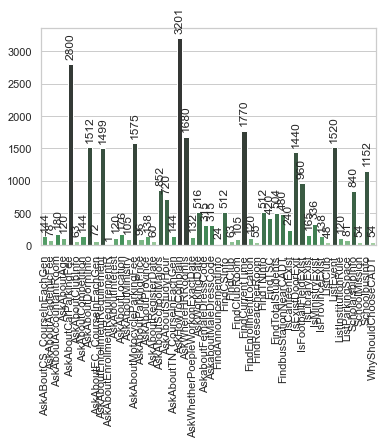

In [11]:
# plt.figure(figsize=(16,8))
sns.set(style="whitegrid", color_codes=True)

dataCount = allDataset.groupby("Intent").size()

aray = getPalleteAndArrangeValue(color="Greens_d", size=dataCount)

ax = sns.barplot(x=dataCount.index.tolist(), y=dataCount.values.tolist(), palette=aray)

plt.bar_label(ax.containers[0], padding=5, rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

print(dataCount)
print("-------------------------")
plt.show()

In [ ]:
# Find Total
print("Total Sentence length: ", allDataset.Question.count())

## Find Max Sentence Length

In [ ]:
temp = pd.read_csv("all_data/all_segment_dataset.csv")

temp["Question_length"] = temp["Question"].apply(lambda x: len(x.split(" ")))
print(temp["Question_length"].describe())

max = temp["Question_length"].max()

print("Max Sentence Length: ", max)


## Find Max number of Intent

In [ ]:
temp = pd.read_csv("all_data/all_data_dataset.csv")
len(temp["Intent"].unique())

## Check amount of entities as well as for any errors

In [ ]:
entityDataFrame = pd.read_csv("all_data/all_entity_dataset.csv")
entityFrame = pd.read_csv("Named Entity.csv")
entityFrame.info()

In [ ]:
# Remove white space from column name and apply it to csv file
# TODO: This is still experimenting, use with caution

# entityFrame = entityFrame.rename(columns={entityFrame.columns.values[1]: "Question"})
# entityFrame.to_csv("Named Entity.csv", index=False)

In [ ]:
# Check total amount of entity number
entityDataFrame = pd.read_csv("all_data/all_entity_dataset.csv")
entityFrame = pd.read_csv("Named Entity.csv")

myDict = {}
errorDict = {}

entityTag = entityFrame["NE Code"].to_list()
entitySentences = entityDataFrame["Question"].to_list()

for x in entityTag:
    count = 0
    error = 0
    for index, row in entityDataFrame.iterrows():
        sentence = row["Question"].split()
        for c in range(len(sentence)):
            # Matches /B-Word until space
            if re.search(r"/B-{}$".format(x), sentence[c]):
                count += 1
                split = sentence[c].rsplit("/B-", maxsplit=1)[1]
                myDict.update({split: row["Intent"]})
                # myDict.update({split: count})

            elif re.search(r"/B-{}.*[^\s]".format(x), sentence[c]):
                error += 1
                split = sentence[c].rsplit("/B-", maxsplit=1)[1]
                errorDict.setdefault(split, []).append(row["Intent"])

            if re.search(r"/I-{}.*[^\s]".format(x), sentence[c]):
                error += 1
                split = sentence[c].rsplit("/I-", maxsplit=1)[1]
                errorDict.setdefault(split, []).append(row["Intent"])

print(errorDict)

## Search through Punctuation

In [25]:
entityDataFrame = pd.read_csv("all_data/all_pos_dataset.csv")
entityFrame = pd.read_csv("pos_structure.csv")


errorDict = {}

entityTag = entityFrame["pos"].to_list()
entitySentences = entityDataFrame["Question"].to_list()

for x in entityTag:
    print(x)
    count = 0
    error = 0
    for index, row in entityDataFrame.iterrows():
        sentence = row["Question"].split()
        for c in range(len(sentence)):
            # Matches /B-Word until space
            if re.search(r"/{}[^\s,]".format(x), sentence[c]):
                error += 1
                split = sentence[c].rsplit("/", maxsplit=1)[1]
                errorDict.setdefault(split, []).append(row["Intent"])

print(errorDict)

prt
verb
adp
adv
noun
{}


In [ ]:
entityAmount = pd.DataFrame(myDict.items(), columns=["Intent", "Amount"])
entityAmount.sort_values(by=["Amount"], inplace=True, ascending=False)

color = getPalleteAndArrangeValue("crest", entityAmount["Amount"])

plt.pie(x=entityAmount["Amount"], labels=entityAmount["Intent"], colors=color, autopct="%.2f")

# plt.show()

In [ ]:
## Calculate the percentage

# Sum of Intent
totalIntentTag = sum(myDict[x] for x in myDict)
rise = ["{0:.2f}%".format(myDict[x] * 100 / totalIntentTag) for x in myDict]

entityAmount["Percentage"] = rise
entityAmount


## Count each word occurence